In [17]:
import numpy as np
import pandas as pd

In [2]:
premonitory = pd.read_csv(r"..\data\earthquakes_and_premonitory.csv")

In [3]:
premonitory.head()

,Unnamed: 0,significance,magnitudo,state,longitude,latitude,depth,date,n_tremors_14_days,n_tremors_13_days,...,avg_sign_of_ptremors_10_days,avg_sign_of_ptremors_9_days,avg_sign_of_ptremors_8_days,avg_sign_of_ptremors_7_days,avg_sign_of_ptremors_6_days,avg_sign_of_ptremors_5_days,avg_sign_of_ptremors_4_days,avg_sign_of_ptremors_3_days,avg_sign_of_ptremors_2_days,avg_sign_of_ptremors_1_days
0,3194670,554,6.0,South Sandwich Islands region,-25.2678,-58.0284,22.0,2021-11-01 00:02:48.965000+00:00,0.0,3.0,...,321.333333,359.75,354.0,NaN,377.0,298.0,NaN,321.2,344.666667,NaN
1,3194974,557,6.0,Indonesia,96.7090,0.2081,8.0,2021-11-01 17:04:16.557000+00:00,0.0,0.0,...,NaN,NaN,NaN,298.0,NaN,NaN,NaN,284.0,NaN,NaN
2,3196884,559,6.0,Indonesia,124.2812,-0.0451,34.0,2021-11-06 14:37:36.731000+00:00,0.0,1.0,...,NaN,NaN,NaN,NaN,298.0,NaN,369.0,305.0,NaN,NaN
3,3197954,680,6.3,Nicaragua,-86.5255,11.2198,20.0,2021-11-09 06:25:14.907000+00:00,0.0,0.0,...,NaN,390.00,NaN,312.0,NaN,NaN,NaN,NaN,NaN,545.0
4,3198468,688,6.6,Japan,126.4474,23.5935,12.0,2021-11-10 15:45:13.652000+00:00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
premonitory_full = premonitory.copy()
premonitory_full.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
premonitory_full.fillna(0, inplace = True)
premonitory_full.columns

Index(['ID', 'significance', 'magnitudo', 'state', 'longitude', 'latitude',
       'depth', 'date', 'n_tremors_14_days', 'n_tremors_13_days',
       'n_tremors_12_days', 'n_tremors_11_days', 'n_tremors_10_days',
       'n_tremors_9_days', 'n_tremors_8_days', 'n_tremors_7_days',
       'n_tremors_6_days', 'n_tremors_5_days', 'n_tremors_4_days',
       'n_tremors_3_days', 'n_tremors_2_days', 'n_tremors_1_days',
       'avg_magn_of_ptremors_14_days', 'avg_magn_of_ptremors_13_days',
       'avg_magn_of_ptremors_12_days', 'avg_magn_of_ptremors_11_days',
       'avg_magn_of_ptremors_10_days', 'avg_magn_of_ptremors_9_days',
       'avg_magn_of_ptremors_8_days', 'avg_magn_of_ptremors_7_days',
       'avg_magn_of_ptremors_6_days', 'avg_magn_of_ptremors_5_days',
       'avg_magn_of_ptremors_4_days', 'avg_magn_of_ptremors_3_days',
       'avg_magn_of_ptremors_2_days', 'avg_magn_of_ptremors_1_days',
       'avg_sign_of_ptremors_14_days', 'avg_sign_of_ptremors_13_days',
       'avg_sign_of_ptremors

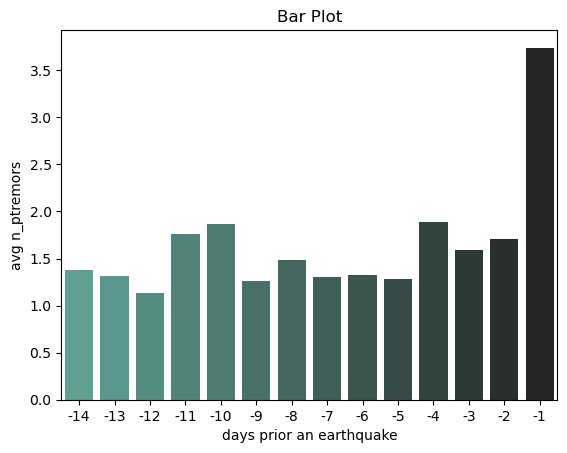

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

categ = np.array([n for n in range(-14,0)])
values = [np.mean(premonitory_full["n_tremors_{}_days".format(i)]) for i in range(14,0,-1)]

sns.barplot(x=categ, y=values, palette = "dark:#5A9_r")
plt.xlabel('days prior an earthquake')
plt.ylabel('avg n_ptremors')
plt.title('Bar Plot')

plt.show()

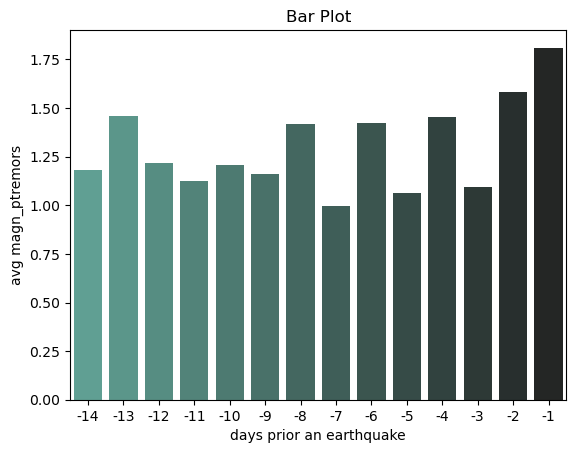

In [6]:
categ = np.array([n for n in range(-14,0)])
values = [np.mean(premonitory_full["avg_magn_of_ptremors_{}_days".format(i)]) for i in range(14,0,-1)]

sns.barplot(x=categ, y=values, palette = "dark:#5A9_r")
plt.xlabel('days prior an earthquake')
plt.ylabel('avg magn_ptremors')
plt.title('Bar Plot')

plt.show()

C:\Users\DIEGO MEZA\anaconda3\envs\EarthquakesEnv\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


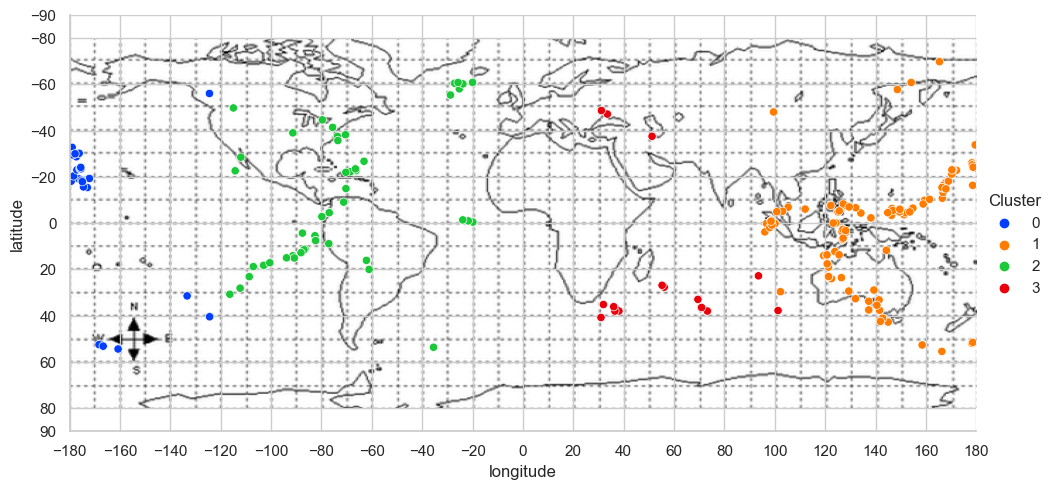

In [21]:
from sklearn.cluster import KMeans

X_1 = premonitory_full.loc[:,["latitude","longitude"]]
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init = 10)
X_1["Cluster"] = kmeans.fit_predict(X_1)
X_1["Cluster"] = X_1["Cluster"].astype("category")
plot = sns.relplot(
    x = "longitude", y = "latitude", hue = "Cluster", data = X_1, palette = "bright", height = 5, aspect = 2
)
plot.ax.grid(True)

img = plt.imread("../images/map.jpg")
#img_extent = [X_1["longitude"].min(), X_1["longitude"].max(), X_1["latitude"].min(), X_1["latitude"].max()]
img_extent = [-180,180,80,-80]
plot.ax.imshow(img, extent=img_extent, aspect="auto", zorder=-1)

custom_yticks = [-90, -80, -60, -40, -20, 0, 20, 40, 60, 80, 90]
custom_xticks = [-180, -160, -140, -120, -100, -80, -60, -40, -20, 0, 20, 40, 60, 80, 100, 120, 140, 160, 180]
plot.ax.set_xticks(custom_xticks)
plot.ax.set_yticks(custom_yticks)

plt.show()

In [8]:
premonitory_full["location_cluster"] = X_1.Cluster
premonitory_full.columns

Index(['ID', 'significance', 'magnitudo', 'state', 'longitude', 'latitude',
       'depth', 'date', 'n_tremors_14_days', 'n_tremors_13_days',
       'n_tremors_12_days', 'n_tremors_11_days', 'n_tremors_10_days',
       'n_tremors_9_days', 'n_tremors_8_days', 'n_tremors_7_days',
       'n_tremors_6_days', 'n_tremors_5_days', 'n_tremors_4_days',
       'n_tremors_3_days', 'n_tremors_2_days', 'n_tremors_1_days',
       'avg_magn_of_ptremors_14_days', 'avg_magn_of_ptremors_13_days',
       'avg_magn_of_ptremors_12_days', 'avg_magn_of_ptremors_11_days',
       'avg_magn_of_ptremors_10_days', 'avg_magn_of_ptremors_9_days',
       'avg_magn_of_ptremors_8_days', 'avg_magn_of_ptremors_7_days',
       'avg_magn_of_ptremors_6_days', 'avg_magn_of_ptremors_5_days',
       'avg_magn_of_ptremors_4_days', 'avg_magn_of_ptremors_3_days',
       'avg_magn_of_ptremors_2_days', 'avg_magn_of_ptremors_1_days',
       'avg_sign_of_ptremors_14_days', 'avg_sign_of_ptremors_13_days',
       'avg_sign_of_ptremors

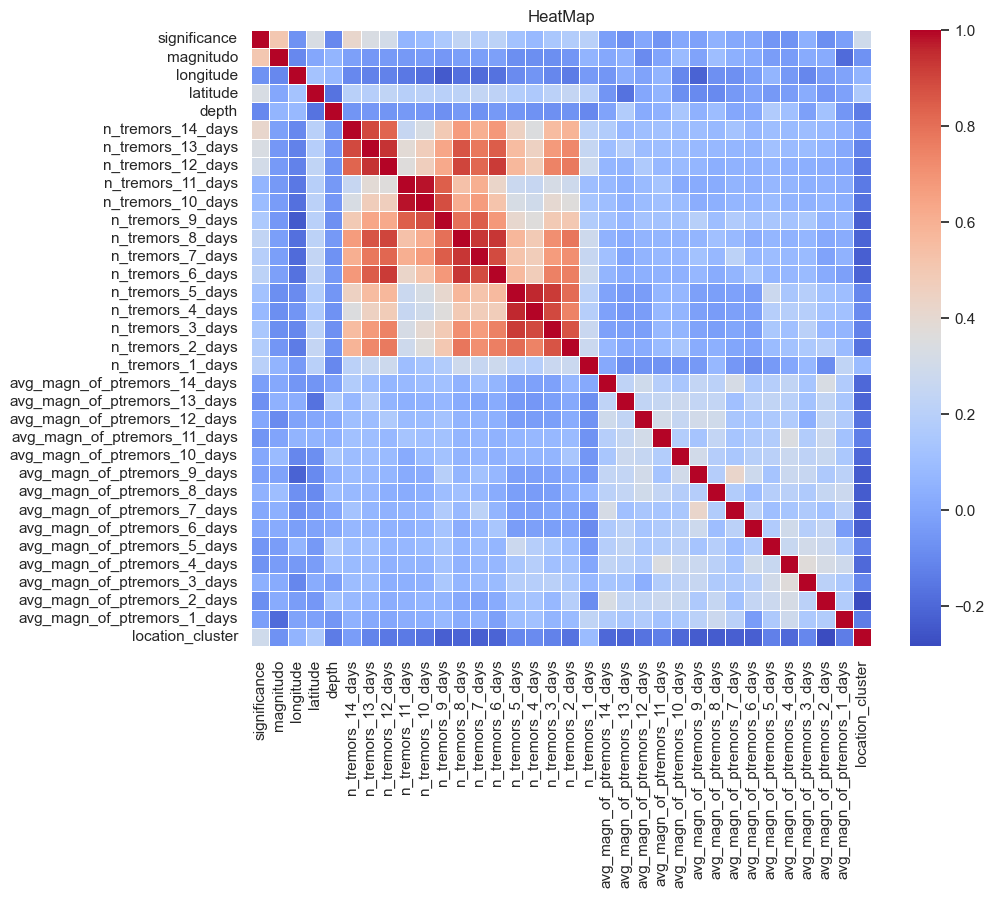

In [9]:
correlation_matrix = premonitory_full.drop(columns = ['date','state','ID','avg_sign_of_ptremors_14_days', 'avg_sign_of_ptremors_13_days',
       'avg_sign_of_ptremors_12_days', 'avg_sign_of_ptremors_11_days',
       'avg_sign_of_ptremors_10_days', 'avg_sign_of_ptremors_9_days',
       'avg_sign_of_ptremors_8_days', 'avg_sign_of_ptremors_7_days',
       'avg_sign_of_ptremors_6_days', 'avg_sign_of_ptremors_5_days',
       'avg_sign_of_ptremors_4_days', 'avg_sign_of_ptremors_3_days',
       'avg_sign_of_ptremors_2_days', 'avg_sign_of_ptremors_1_days']).corr()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title('HeatMap')

# Mostrar el gráfico
plt.show()

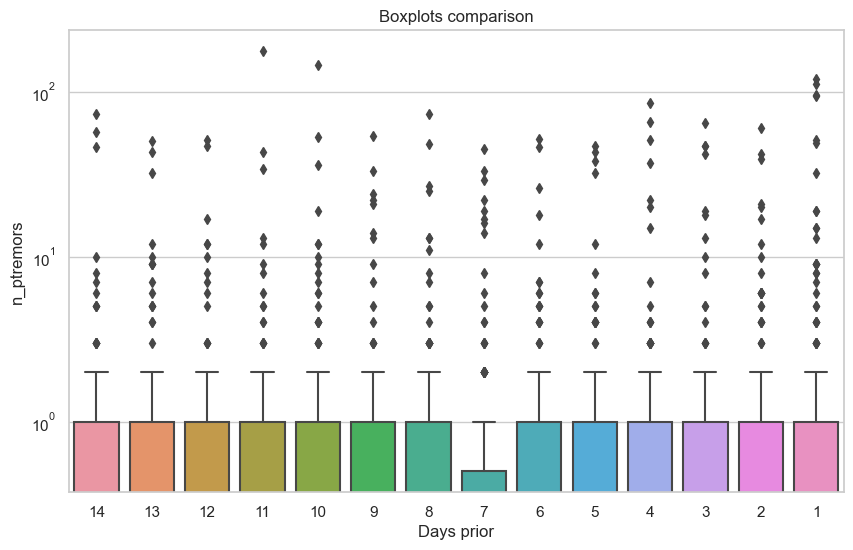

In [10]:
data_boxplots = premonitory_full[['n_tremors_14_days', 'n_tremors_13_days',
       'n_tremors_12_days', 'n_tremors_11_days', 'n_tremors_10_days',
       'n_tremors_9_days', 'n_tremors_8_days', 'n_tremors_7_days',
       'n_tremors_6_days', 'n_tremors_5_days', 'n_tremors_4_days',
       'n_tremors_3_days', 'n_tremors_2_days', 'n_tremors_1_days']]
plt.figure(figsize=(10, 6))

sns.boxplot(data=data_boxplots)

plt.xlabel('Days prior')
plt.ylabel('n_ptremors')
plt.title('Boxplots comparison')
plt.xticks(ticks = range(14), labels = list(range(14,0,-1)))
plt.yscale('log')

plt.show()

In [11]:
data_boxplots.describe()

,n_tremors_14_days,n_tremors_13_days,n_tremors_12_days,n_tremors_11_days,n_tremors_10_days,n_tremors_9_days,n_tremors_8_days,n_tremors_7_days,n_tremors_6_days,n_tremors_5_days,n_tremors_4_days,n_tremors_3_days,n_tremors_2_days,n_tremors_1_days
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,1.374429,1.315068,1.132420,1.762557,1.867580,1.260274,1.484018,1.301370,1.324201,1.283105,1.885845,1.589041,1.703196,3.739726
std,7.022015,5.152384,5.023413,12.486259,10.832156,5.162570,6.528938,4.995461,5.253213,5.535725,8.657644,7.118594,6.113494,15.133074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,73.000000,50.000000,51.000000,176.000000,145.000000,54.000000,73.000000,45.000000,52.000000,47.000000,86.000000,65.000000,60.000000,120.000000


In [29]:
from scipy.stats import ttest_ind

df_ttest = pd.DataFrame(columns=["Comparison", "T-statistic", "P-value", "Decision"])

for n in range(2, 15):
    group1 = data_boxplots["n_tremors_1_days"]
    group2 = data_boxplots["n_tremors_{}_days".format(n)]

    t_statistic, p_value = ttest_ind(group1, group2)

    comparison = "1 vs {}".format(n)
    t_statistic_rounded = round(t_statistic, 4)
    p_value_rounded = round(p_value, 4)

    alpha = 0.05
    if p_value < alpha:
        decision = "Reject the null hypothesis. There is a significant difference between the two groups."
    else:
        decision = "Fail to reject the null hypothesis. There is no significant difference between the two groups."

    df_ttest.loc[len(df_ttest)] = [comparison, t_statistic_rounded, p_value_rounded, decision]

pd.set_option('display.max_colwidth', None)
df_ttest

,Comparison,T-statistic,P-value,Decision
0,1 vs 2,1.8465,0.0655,Fail to reject the null hypothesis. There is no significant difference between the two groups.
1,1 vs 3,1.9031,0.0577,Fail to reject the null hypothesis. There is no significant difference between the two groups.
2,1 vs 4,1.5736,0.1163,Fail to reject the null hypothesis. There is no significant difference between the two groups.
3,1 vs 5,2.2561,0.0246,Reject the null hypothesis. There is a significant difference between the two groups.
4,1 vs 6,2.2315,0.0262,Reject the null hypothesis. There is a significant difference between the two groups.
5,1 vs 7,2.2643,0.0240,Reject the null hypothesis. There is a significant difference between the two groups.
6,1 vs 8,2.0254,0.0434,Reject the null hypothesis. There is a significant difference between the two groups.
7,1 vs 9,2.2948,0.0222,Reject the null hypothesis. There is a significant difference between the two groups.
8,1 vs 10,1.4887,0.1373,Fail to reject the null hypothesis. There is no significant difference between the two groups.
9,1 vs 11,1.4914,0.1366,Fail to reject the null hypothesis. There is no significant difference between the two groups.


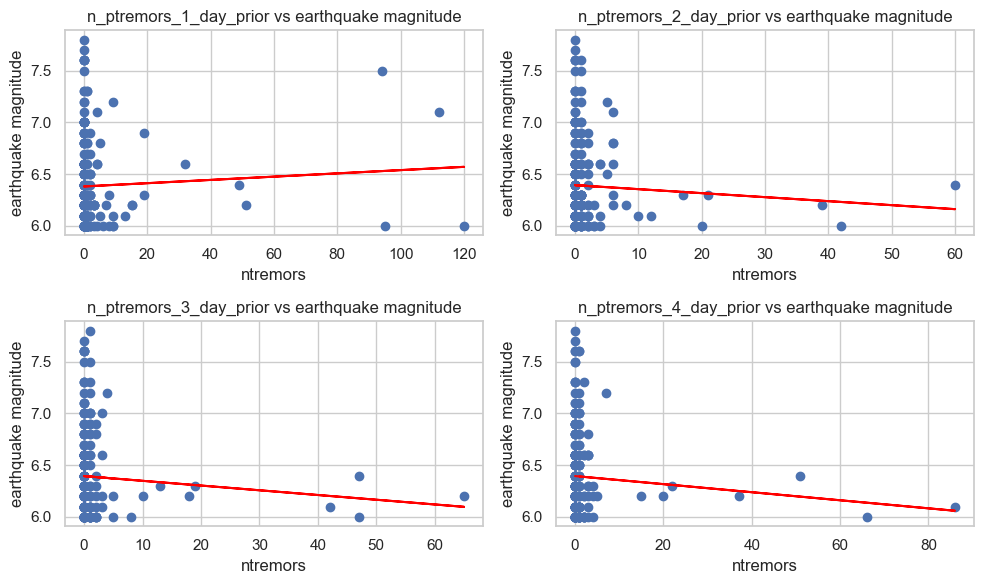

In [13]:
x1_data = premonitory_full["n_tremors_1_days"]
x2_data = premonitory_full["n_tremors_2_days"]
x3_data = premonitory_full["n_tremors_3_days"]
x4_data = premonitory_full["n_tremors_4_days"]
y_data = premonitory_full["magnitudo"]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.scatter(x1_data, y_data)
m1, b1 = np.polyfit(x1_data, y_data, 1)
plt.plot(x1_data, m1 * np.array(x1_data) + b1, color='red')
plt.title('n_ptremors_1_day_prior vs earthquake magnitude')
plt.xlabel('ntremors')
plt.ylabel('earthquake magnitude')

plt.subplot(2, 2, 2)
plt.scatter(x2_data, y_data)
m2, b2 = np.polyfit(x2_data, y_data, 1)
plt.plot(x2_data, m2 * np.array(x2_data) + b2, color='red')
plt.title('n_ptremors_2_day_prior vs earthquake magnitude')
plt.xlabel('ntremors')
plt.ylabel('earthquake magnitude')

plt.subplot(2, 2, 3)
plt.scatter(x3_data, y_data)
m3, b3 = np.polyfit(x3_data, y_data, 1)
plt.plot(x3_data, m3 * np.array(x3_data) + b3, color='red')
plt.title('n_ptremors_3_day_prior vs earthquake magnitude')
plt.xlabel('ntremors')
plt.ylabel('earthquake magnitude')

plt.subplot(2, 2, 4)
plt.scatter(x4_data, y_data)
m4, b4 = np.polyfit(x4_data, y_data, 1)
plt.plot(x4_data, m4 * np.array(x4_data) + b4, color='red')
plt.title('n_ptremors_4_day_prior vs earthquake magnitude')
plt.xlabel('ntremors')
plt.ylabel('earthquake magnitude')

plt.tight_layout()
plt.show()

In [14]:
X = premonitory_full.drop(columns = ['ID', 'significance', 'magnitudo', 'state','date'])
target = premonitory_full.magnitudo

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

model1 = make_pipeline(scaler1, LinearRegression())
model2 = make_pipeline(scaler1, RandomForestRegressor())
model3 = make_pipeline(scaler1, Ridge())
model4 = make_pipeline(scaler1, GradientBoostingRegressor())
model5 = make_pipeline(scaler2, LinearRegression())
model6 = make_pipeline(scaler2, RandomForestRegressor())
model7 = make_pipeline(scaler2, Ridge())
model8 = make_pipeline(scaler2, GradientBoostingRegressor())

model_list = [globals()[f"model{n}"] for n in range(1, 9)]
m = 1
for model in model_list:
    cv_scores = cross_val_score(model, X, target, cv=5, scoring='r2')
    print("Model {} Mean R2 Score:".format(m), cv_scores.mean())
    m += 1

Model 1 Mean R2 Score: -0.667990646103239
Model 2 Mean R2 Score: -0.13620428513714722
Model 3 Mean R2 Score: -0.5597060075640299
Model 4 Mean R2 Score: -0.29765968408449694
Model 5 Mean R2 Score: -0.6679906461032192
Model 6 Mean R2 Score: -0.14681858131099831
Model 7 Mean R2 Score: -0.14731556273393465
Model 8 Mean R2 Score: -0.30552258150959066
